# 多层感知机的简洁实现

本节将介绍(**通过高级API更简洁地实现多层感知机**)。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 模型

与[softmax回归的简洁实现](https://github.com/lixinjie97/Deep_learning_tutorial/blob/main/02.linear-networks/07.softmax-regression-concise.ipynb)相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。
第二层是输出层。

In [2]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 256), 
                    nn.ReLU(), 
                    nn.Linear(256, 10))

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weight);

[**训练过程**]的实现与我们实现softmax回归是完全相同，
这种模块化设计使我们能够将与模型架构有关的内容独立出来。

In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

(报错需要降低d2l的版本pip install d2l==0.17.5 --user，pip install numpy==1.22)。

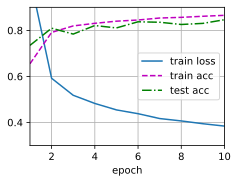

In [4]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 小结

* 我们可以使用高级API更简洁地实现多层感知机。
* 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。

## 练习

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？

#### 练习一

&emsp;&emsp;考虑隐藏层数去512, 256, 128, 64, 32, 16以及0.0001, 0.001, 0.01, 0.1, 1, 10取值范围的学习率，发现隐藏层数取256学习率取0.1效果最好。

&emsp;&emsp;以下使用torch编程进行实验：

max batch_size:256, num_epochs:10, num_hiddens:512, lr:0.1, test_acc:0.8533, train_acc:0.8651166666666666, train_loss:0.378406289990743


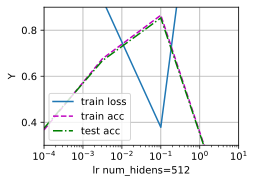

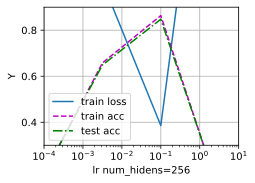

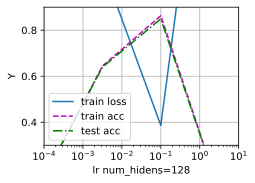

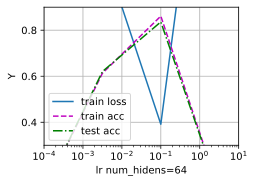

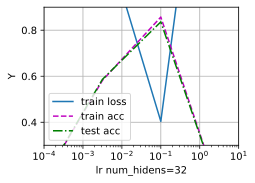

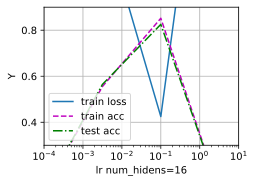

In [1]:
import torch
from d2l import torch as d2l
from torch import nn
import numpy as np

def init_weights4_3_1(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

def mytrain4_3_1(lr=0.1, num_hiddens=256, ac='ReLU', show=1, assertshow=1):
    net = nn.Sequential(nn.Flatten(), nn.Linear(784, num_hiddens))
    if ac == "Sigmoid":
        net.add_module('Sigmoid', nn.Sigmoid())
    elif ac == "Tanh":
        net.add_module('Tanh', nn.Tanh())
    else:
        net.add_module('ReLU', nn.ReLU())
    net.add_module('Linear', nn.Linear(num_hiddens, 10))
    net.apply(init_weights4_3_1);
    batch_size, num_epochs = 256, 10
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    if show == 1:
        animator = d2l.Animator(xlabel=f'epoch {ac} lr = {float(lr):f} num_hiddens={num_hiddens}', ylabel='Y', xlim=[1, num_epochs], ylim=[0.3, 0.9], 
                               lengend=['train loss', 'trian acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        if show == 1:
            animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    if assertshow == 1:
        assert train_loss < 0.5, train_loss
        assert train_acc <= 1 and train_acc > 0.7, train_acc
        assert test_acc <= 1 and test_acc > 0.7, test_acc
    return train_loss, train_acc, test_acc

result = []
for num_hiddens in [512, 256, 128, 64, 32, 16]:
    animator2 = d2l.Animator(xlabel=f'lr num_hidens={num_hiddens}', ylabel='Y', xlim=[1e-4, 10], xscale='log', ylim=[0.3, 0.9], 
                            legend=['train loss', 'train acc', 'test acc'])
    for lr in np.logspace(-4, 2, 5): # np.logspace(-4,2,5) 会生成一个包含 5 个元素的数组，这些元素是从 10^(-4) 到 10^2 的等比数列
        train_loss, train_acc, test_acc = mytrain4_3_1(lr=lr, num_hiddens=num_hiddens, show=0, assertshow=0)
        animator2.add(lr, (train_loss, train_acc, test_acc))
        result.append([num_hiddens, lr, test_acc, train_acc, train_loss])

resultmax = sorted(result, key=lambda x: x[2])[-1]
print(f'max batch_size:{256}, num_epochs:{10}, num_hiddens:{resultmax[0]}, lr:{resultmax[1]}, test_acc:{resultmax[2]}, train_acc:{resultmax[3]}, train_loss:{resultmax[4]}')

### 练习二

&emsp;&emsp;$ReLU$效果最好，$Tanh$次之，$Sigmoid$最差训练损失最后超过了0.5。

Sigmod train_loss: 0.5044742208480835


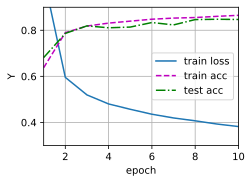

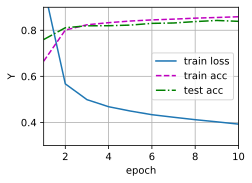

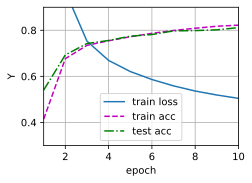

In [1]:
import torch
from d2l import torch as d2l
from torch import nn
import numpy as np

def init_weights4_3_2(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

def train_diffactivation_function(ac):
    print(ac)
    net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256))
    if ac == "Sigmoid":
        net.add_module('Sigmoid', nn.Sigmoid())
    elif ac == 'Tanh':
        net.add_module('Tanh', nn.Tanh())
    else:
        net.add_module('ReLU', nn.ReLU())
    net.add_module('Linear', nn.Linear(256, 10))
    net.apply(init_weights4_3_2)
    batch_size, lr, num_epochs = 256, 0.1, 10
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
    d2l.plt.ylabel("Y");

# 训练 ReLU 激活函数的网路
train_diffactivation_function(ac="ReLU")
# 训练 Tanh 激活函数的网络
train_diffactivation_function(ac="Tanh")
# 训练 Sigmoid 激活函数的网络
try:
    train_diffactivation_function(ac="Sigmoid")
except Exception as e:
    d2l.plt.ylabel("Y")
    print('Sigmod train_loss:', e)

### 练习三

&emsp;&emsp;尝试了正态分布初始化权重，单位矩阵初始化权重，均匀分布初始化权重，在这个问题上单位矩阵初始权重的结果表现更好。

&emsp;&emsp;以下使用`torch`编程进行实验：

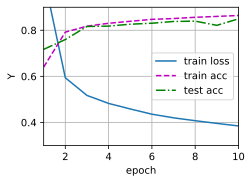

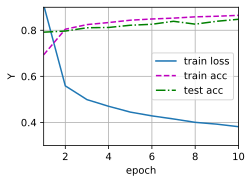

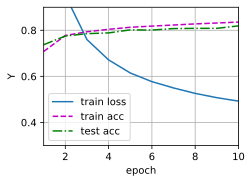

In [1]:
import torch
from d2l import torch as d2l
from torch import nn
import numpy as np

def normal_weights(m):
    if type(m) == nn.Linear:
        # 对参数 m.weight 进行均值为 0 ，标准差为 0.01 的正态分布初始化
        nn.init.normal_(m.weight, std=0.01)
        print("normal", m.weight)

def eye_weights(m):
    if type(m) == nn.Linear:
        # 对参数 m.weight 进行单位矩阵初始化
        nn.init.eye_(m.weight)
        print("eye", m.weight)

def uniform_weights(m):
    if type(m) == nn.Linear:
        # 参数从均匀分布[-1, 1]进行初始化
        nn.init.uniform_(m.weight, a=-1, b=1)
        print("uniform", m.weight)

def train_diffweight(w):
    net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))
    if w == 0:
        net.apply(normal_weights);
    elif w == 1:
        net.apply(eye_weights);
    else:
        net.apply(uniform_weights);
    batch_size, lr, num_epochs = 256, 0.1, 10
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
    d2l.plt.ylabel("Y")

train_diffweight(0)
train_diffweight(1)
train_diffweight(2)